In [ ]:
#掛載GoogleDrive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


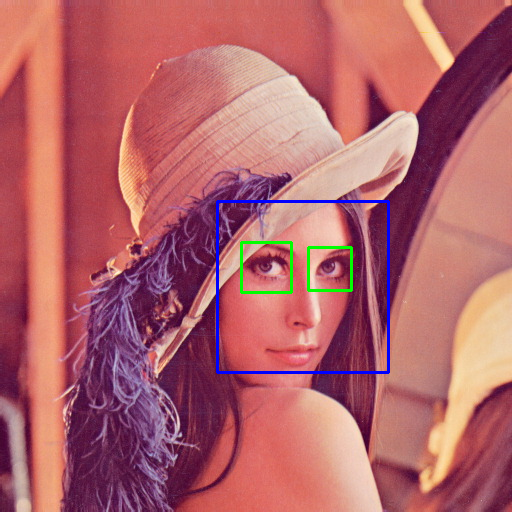

In [ ]:
#載入相關套件
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

#載入人臉/人眼偵測訓練集
pathname = '/content/gdrive/My Drive/Colab Notebooks/'
face_cascade = cv2.CascadeClassifier(pathname+'data/haarcascades/haarcascade_frontalface_alt.xml')
eye_cascade = cv2.CascadeClassifier(pathname+'data/haarcascades/haarcascade_eye_tree_eyeglasses.xml')
filename = 'data/Lenna.jpg'
img = cv2.imread(pathname + filename)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #影像轉灰階

faces = face_cascade.detectMultiScale(gray, 1.3, 5) #偵測人臉

#繪製人臉矩形框
for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2) #繪製人臉矩形框
    roi_gray = gray[y:y+h, x:x+w] #讀取人臉區域灰階影像
    roi_color = img[y:y+h, x:x+w] #讀取人臉區域彩色影像
    eyes = eye_cascade.detectMultiScale(roi_gray) #偵測人眼
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2) #繪製人眼矩形框

cv2_imshow(img)